In [35]:
# modules
from glob import glob
import re
import os.path
from itertools import repeat
import csv
import numpy as np
import pandas as pd

# look at the following pre and post motion correction:
# dvars_std, dvars_vstd / Fwhm_avg / Gsr_x, Gsr_y / snr / tsnr / Fd_mean)

file='bold.csv'
sub_array = []
value_array = []
dvars_std = []
dvars_vstd = []
fwhm = []
gsr_x = []
gsr_y = []
snr = []
tsnr = []
fd = []
holdbox = []
in_group = []
hold = []
counter = 0
#abide_compare = abide_csv[abide_csv.subject.isin(asubjs)].ix[:, ['subject', 'anat_cnr', 'func_mean_fd']].reset_index(drop=True)

categories = ['sub_array','dvars_std', 'dvars_vstd', 'fwhm_mean', 'gsr_x', 'gsr_y', 'snr', 'tsnr','fd_mean', 'hold', 'in_group']

site = 'CBT' #TASTI2 ; EIB also not done (need all conditions in txt file)
path='/om/group/saxelab/OpenAutism/data/'+site+'/mriqc_output/'

    
with open(path+file) as tsv:
    for line in csv.reader(tsv,  delimiter = ","):
        #print(line[0]+line[1]+line[2])
        counter = counter + 1
        if counter == 1:
            continue
        elif line[0]+line[1]+line[2] in open('MISSING_final.csv').read():
            print("MISSING_FMRIPREP")
            continue # leaving out ones that don't have fmriprep output
        else:
            #print(line[0]+line[1]+line[2])
            sub_array.append(line[0])
            dvars_std.append(float(line[7]))
            dvars_vstd.append(float(line[8]))
            fwhm.append(float(line[14]))
            gsr_x.append(float(line[19]))
            gsr_y.append(float(line[20]))
            snr.append(float(line[25]))
            tsnr.append(float(line[47]))
            fd.append(float(line[11]))
            hold.append(1)
            holdbox.append(-1)
            if line[0]+line[1]+line[2] in open('Runs_MotionFiltered.csv').read():
                in_group.append('Include') 
#             elif line[0]+line[1]+line[2] in open('MISSING_final.csv').read():
#                 print("MISSING_FMRIPREP")
#                 in_group.append('Missing_fmriprep')
            elif line[0] in open('Design.txt').read():
                in_group.append('emptyspace')
            else:
                in_group.append('Exclude') 

d = {'hold': hold, 'fd_mean': fd,'tsnr': tsnr,'snr': snr,'gsr_y': gsr_y,'gsr_x': gsr_x,'fwhm_mean': fwhm,'dvars_vstd': dvars_vstd,'dvars_std': dvars_std, 'Motion_Outlier': in_group, 'subject': sub_array, 'holdbox': holdbox}
df = pd.DataFrame(data=d)

print("Only includes data contained in MRIQC bold.csv file.")
print(df)


Only includes data contained in MRIQC bold.csv file.
    Motion_Outlier  dvars_std  dvars_vstd   fd_mean  fwhm_mean     gsr_x  \
0          Exclude   1.275362    1.063770  0.397137   2.440768 -0.031949   
1          Exclude   1.350993    1.138644  0.474936   2.411703 -0.031207   
2          Exclude   1.412855    1.217085  0.669570   2.441454 -0.032265   
3          Include   1.205183    1.026020  0.265062   2.421614 -0.031441   
4          Include   1.167242    0.996136  0.099910   2.701073 -0.010573   
5          Include   1.280031    1.123952  0.272270   2.686168 -0.007168   
6          Include   1.184317    1.012646  0.118305   2.692870 -0.008486   
7          Include   1.141754    0.989376  0.125445   2.644987 -0.003993   
8          Exclude   1.399724    1.186421  0.519913   2.514602 -0.027506   
9          Exclude   1.473443    1.279563  0.929504   2.570270 -0.024042   
10         Exclude   1.430929    1.190471  0.531330   2.520158 -0.027330   
11         Exclude   1.363921    1.

['sub_array', 'dvars_std', 'dvars_vstd', 'fwhm_mean', 'gsr_x', 'gsr_y', 'snr', 'tsnr', 'fd_mean', 'hold', 'in_group']
dvars_std
dvars_vstd
fwhm_mean
gsr_x
gsr_y
snr
tsnr
fd_mean


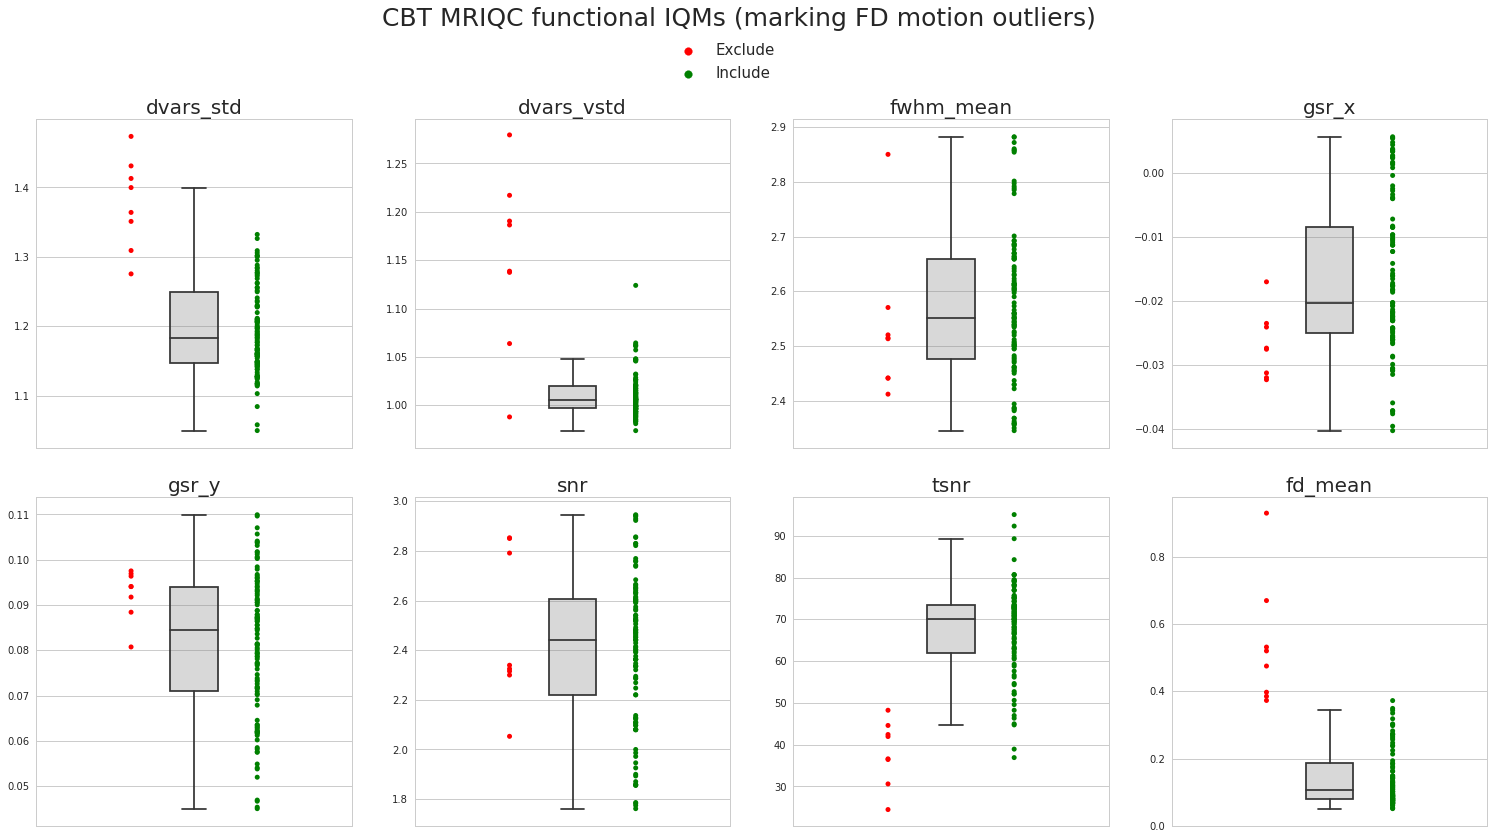

In [36]:
# plot the array in a boxplot
import matplotlib.pyplot as plt
import seaborn as sns

print(categories)

fig = plt.figure(figsize=(26,13))
ttl = fig.suptitle(site+' MRIQC functional IQMs (marking FD motion outliers)', fontsize=25)
ttl.set_position([.5, 1])

#fig.set(title='MRIQC functional IQMs')

for i in range(1, 9):
    print(categories[i])
    sns.set(style="whitegrid")
    ax = plt.subplot(2, 4, i)
    #plt.text(0.005, 0.005, str((2, 3, i)),
             #fontsize=12, ha='center')       
        
    # make boxplot with Seaborn
    ax=sns.boxplot(x="holdbox",y=categories[i], data=df,width=0.15,
                     palette="colorblind",showfliers=False)
    mybox = ax.artists[0]
    mybox.set_facecolor('grey')
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3)) 

    if site == 'Berlin':    
        sel_pal = ['green','red']   
    elif site == 'DOD':
        sel_pal = ['green','red','yellow']  
    elif site == 'CBT':
        sel_pal = ['red','green']  
    elif site == 'EIB':
        sel_pal = ['green','red']  
    elif site == 'TASTI2':
        sel_pal = ['green','red']  
        
    # replace x with the IQMS
    ax = sns.stripplot(x="hold", y=categories[i], hue="Motion_Outlier", data=df,dodge = True, alpha = 1, palette = sel_pal) #palette=sns.color_palette("muted")) #palette="Set3")
    
    ax.axes.set_title(categories[i],fontsize=20)
    ax.set(xlabel="")
    ax.set(ylabel="")
    ax.set_xticklabels("")
    
    ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') 
        
    fig.subplots_adjust(hspace=.15, wspace=.2)

    if i == 4:
        #ax.legend(loc = 'best',prop={'size':14})
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(bbox_to_anchor=(-1.6, 1.25), loc=2, borderaxespad=0., prop={'size': 15})
    else:
        ax.legend([])
        
plt.savefig('./MRIQC_MotionCorr/Plots/'+site+'_MRIQC_bold_IQMs.png')